# Capstone Project - The Battle of Neighborhoods 

## Luca Di Narzo

# ----------------------------------------------------------------------------------------------

# Introduction

## Description of the problem and a discussion of the background.

### Scenario

My name is Luca and i come from Milan, Italy. I've always lived in Italy and for us a good espresso coffee is fundamental. In order to find the best espresso in Milan I tried out many coffees and once I've chosen the best one i stick with it. Now I'm going to live in New York. The culture of coffee is different in other countries and I'm afraid I won't be able to find enough coffe shops in NY. That's why I want to apply what I've learned so far to discover a neighbour where there're enough coffee shops in NY like Milan.

### Business model

This work will be very helpful for other italians who want to live abroad and apply the same methodology to other cities.

# Data

## Description of the data and how it will be used to solve the problem

The following data will be used:

- List of Boroughs and neighborhoods of Milan with their geodata;
- List of Boroughs and neighborhoods of Manhattan with their geodata;
- List of coffee shops of Milan with their geodata;
- List of coffee shops of Manhattan with their geodata.


### Data Sources

- Boroughs and neighborhoods of Milan from Wikipedia (https://en.wikipedia.org/wiki/Municipalities_of_Milan);
- Boroughs and neighborhoods of Manhattan from Wikipedia (https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City);
- Geocode information from Geopy;
- Coffee shops in Milan and Manhattan from Foursquare

# Methodology

1. The neighborhood where i live in Milan will be individuated
2. The number of coffee shops will be extrapolated.
3. Different neighborhoods in Manhattab we'll be anallyzed and we'll select just the ones with at least the same amount of coffee shops present in my actual neighborhood
4. One of neighborhood with the highest number of cafes is where i'll live

### Importing the libraries

In [26]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

### Gathering Milan data and processing them

In [211]:
# Importing the neighbourhood data

link_milan = 'https://en.wikipedia.org/wiki/Municipalities_of_Milan'

Milan = pd.read_html(link_milan)[1]
Milan.head()

,Borough,Name,Area(km2),Population(2014),Population density(inhabitants/km2),Quartieri (districts)
0,1.0,Centro storico,9.67,96315.000,11074,"Brera, Centro Storico, Conca del Naviglio, Gua..."
1,2.0,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,13031,"Adriano, Crescenzago, Gorla, Greco, Loreto, Ma..."
2,3.0,"Città Studi, Lambrate, Porta Venezia",14.23,141229.000,10785,"Casoretto, Cimiano, Città Studi, Dosso, Lambra..."
3,4.0,"Porta Vittoria, Forlanini",20.95,156.369,8069,"Acquabella, Calvairate, Castagnedo, Cavriano, ..."
4,5.0,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.000,4487,"Basmetto, Cantalupa, Case Nuove, Chiaravalle, ..."


In [212]:
# Selecting just the columns we're interested in
Milan = Milan[['Name', 'Quartieri (districts)']]
Milan.rename(columns = {'Quartieri (districts)' : 'District'}, inplace = True)
Milan = Milan[0:-1]
Milan.head()

,Name,District
0,Centro storico,"Brera, Centro Storico, Conca del Naviglio, Gua..."
1,"Stazione Centrale, Gorla, Turro, Greco, Cresce...","Adriano, Crescenzago, Gorla, Greco, Loreto, Ma..."
2,"Città Studi, Lambrate, Porta Venezia","Casoretto, Cimiano, Città Studi, Dosso, Lambra..."
3,"Porta Vittoria, Forlanini","Acquabella, Calvairate, Castagnedo, Cavriano, ..."
4,"Vigentino, Chiaravalle, Gratosoglio","Basmetto, Cantalupa, Case Nuove, Chiaravalle, ..."


In [213]:
# Separating the districts in different rows
Milan = pd.DataFrame(Milan.District.str.split(',').tolist(), index=Milan.Name.astype('object')).stack()

Milan = Milan.reset_index([0, 'Name'])

Milan.columns = ['Borough', 'District']
Milan.head()

,Borough,District
0,Centro storico,Brera
1,Centro storico,Centro Storico
2,Centro storico,Conca del Naviglio
3,Centro storico,Guastalla
4,Centro storico,Porta Sempione


In [214]:
# Selecting my district
My_district = Milan[Milan['District'].str.contains('Sempione', na = False)]
My_district

,Borough,District
4,Centro storico,Porta Sempione


In [215]:
# Getting latitude and longitude of my district
address = My_district['District'].values[0] + ', Milan'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of my district are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of my district are 45.4771283, 9.1705984.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
# Creating a map of Milan and finding my district.
map_my_district = folium.Map(location=[latitude, longitude], zoom_start=11)

folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_my_district)

map_my_district

<img src="https://previews.dropbox.com/p/thumb/AAqh2YyVgyE3-gdoC33WIJksW53csP_t0IXrOB0Ufk2TT_j35DtaEnzsCElRMYYkOU3_7Cf0tN2vVzn8NSQMWrhOEh1XAVfxJZixgq48C9-vs4AwYcOUPoIXeqq5Htxuf8HSA7Tezl3H30Tc-HhzxI-tkfmYdafPsQ2_1UQVSEwrG6diYA-BDkyNTI2JqppfloAyzJ3VLJ3Fnppfj8FqIeBeie66jz_hG3gCeT8nfm5c3-1lp-fuWtQx5DrUUej6NLSFD6lJXiGUN9z0-e7xkDWnTUIXurWpajuHrAhDne_Tp50iJDeDRGnXKzlm2RPPT6q5ZQ5S5Ljvr3W8F-9zTVA7/p.jpeg?fv_content=true&size_mode=5"/>

### Extracting the number of cafes in my district area

In [217]:
# Date from foursquare 
CLIENT_ID = 'PNMYSJFPT5BRLSTNSBV2E0CD5PGA4JIEWHTW1EJ1G1N52OZQ' # your Foursquare ID
CLIENT_SECRET = 'NWCZ2XGV2PRJHM413T1WACQBEEUFN3ORENAUJPLDQBZ4HNJJ' # your Foursquare Secret
VERSION = '20191206'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PNMYSJFPT5BRLSTNSBV2E0CD5PGA4JIEWHTW1EJ1G1N52OZQ
CLIENT_SECRET:NWCZ2XGV2PRJHM413T1WACQBEEUFN3ORENAUJPLDQBZ4HNJJ


In [218]:
# We choose to search by category with a 500m radius.
radius = 500
LIMIT = 100
category_id = '4bf58dd8d48988d16d941735' #ID for BAR & CAFE

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, category_id, radius, LIMIT)

# Send the GET Request
results = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Jazz Cafè,Italian Restaurant,"Corso Sempione, 8",45.477195,9.170516,"[{'label': 'display', 'lat': 45.47719508849758...",9,20145,IT,Milano,Lombardia,Italia,"[Corso Sempione, 8, 20145 Milano Lombardia, It...",NaN,NaN,4bc1b7f1abf495216562c193
1,Bar Marilù - Da Mimmo,Café,Corso Sempione,45.477085,9.170541,"[{'label': 'display', 'lat': 45.47708540819612...",6,20145,IT,Milano,Lombardia,Italia,"[Corso Sempione (at via giovanni gherardini), ...",at via giovanni gherardini,NaN,4c3c88aca9509c745b30395b
2,Marilù,Cocktail Bar,Corso Sempione 9,45.477151,9.170518,"[{'label': 'display', 'lat': 45.47715091237248...",6,20145,IT,Milano,Lombardia,Italia,"[Corso Sempione 9, 20145 Milano Lombardia, Ita...",NaN,NaN,4c8f69fead70a143ce41910f
3,Caffè In Giardino,Café,Viale Alemagna 6,45.472538,9.174573,"[{'label': 'display', 'lat': 45.472538, 'lng':...",597,20121,IT,Milano,Lombardia,Italia,"[Viale Alemagna 6, 20121 Milano Lombardia, Ita...",NaN,NaN,5b2f84a57564f7002c3f076c
4,Libreria del Mondo Offeso,Bookstore,Via Cesare Cesariano 7,45.478368,9.176649,"[{'label': 'display', 'lat': 45.47836840463392...",492,20121,IT,Milano,Lombardia,Italia,"[Via Cesare Cesariano 7, 20121 Milano Lombardi...",NaN,NaN,51b0bfc3498e038e58f4461c
5,Canonica 59,Bakery,"Via Canonica, 59",45.479583,9.172872,"[{'label': 'display', 'lat': 45.47958282812870...",325,20154,IT,Milano,Lombardia,Italia,"[Via Canonica, 59, 20154 Milano Lombardia, Ita...",NaN,NaN,4c9cbd717c096dcb0d35c4d1
6,Good Time Cafè,Café,Via Paolo Sarpi 50,45.481193,9.172789,"[{'label': 'display', 'lat': 45.48119307926346...",483,20154,IT,Milano,Lombardia,Italia,"[Via Paolo Sarpi 50, 20154 Milano Lombardia, I...",NaN,Sarpi,4c3afd9862f1c928b3c08e53
7,Happy Bar Tabacchi,Café,"Via Francesco Londonio, 17",45.480474,9.168799,"[{'label': 'display', 'lat': 45.48047365474546...",398,20154,IT,Milano,Lombardia,Italia,"[Via Francesco Londonio, 17, 20154 Milano Lomb...",NaN,NaN,4e16c9fe8877d38dc908fd7d
8,cin cin bar,Café,NaN,45.481251,9.174344,"[{'label': 'display', 'lat': 45.481251, 'lng':...",544,NaN,IT,NaN,NaN,Italia,[Italia],NaN,NaN,56ff856d498eb675170bc081
9,Caffè in diretta,Café,C.so Sempione 23,45.478859,9.167825,"[{'label': 'display', 'lat': 45.47885877836661...",289,20145,IT,Milano,Lombardia,Italia,"[C.so Sempione 23, 20145 Milano Lombardia, Ita...",NaN,Pagano,4e85b86a4fc6f899e2050fa4


In [219]:
print('The total number of cafes in an area of 500m is: ' +str(dataframe_filtered.shape[0]))

The total number of cafes in an area of 500m is: 45


In [220]:
dataframe_filtered.name

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.vector_layers.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### The number of cafes near my house is 45. Now we're going to search for this characteristic in NY

## Gathering NY data and selecting Manhattan

In [221]:
# Importing the neighbourhood data

link_ny = 'https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'

NY = pd.read_html(link_ny)[0]
NY.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."


In [222]:
# Selecting the columns we need and selecting manhattan.
NY = NY[['Community Board(CB)','Neighborhoods']]

NY.rename(columns = {'Community Board(CB)' : 'Borough'}, inplace = True)

NY = NY[NY['Borough'].str.contains('Manhattan', na = False)]
NY.reset_index(drop = True, inplace = True)
NY.head()

,Borough,Neighborhoods
0,Manhattan CB 1,"Battery Park City, Financial District, Tribeca"
1,Manhattan CB 2,"Chinatown, Greenwich Village, Little Italy, Lo..."
2,Manhattan CB 3,"Alphabet City, Chinatown, East Village, Lower ..."
3,Manhattan CB 4,"Chelsea, Clinton, Hudson Yards"
4,Manhattan CB 5,Midtown


In [223]:
# Separating the districts in different rows
NY = pd.DataFrame(NY.Neighborhoods.str.split(',').tolist(), index=NY.Borough.astype('object')).stack()

NY = NY.reset_index([0, 'Borough'])

NY.columns = ['Borough', 'District']
print(NY.shape)
NY.head()

(47, 2)


,Borough,District
0,Manhattan CB 1,Battery Park City
1,Manhattan CB 1,Financial District
2,Manhattan CB 1,Tribeca
3,Manhattan CB 2,Chinatown
4,Manhattan CB 2,Greenwich Village


In [227]:
# Getting latitude and longitude NY 
lat = []
long = []

In [232]:
# This process must be repeated more times because after 20 iterations the service becomes unavailable
for i in np.arange(44,NY.shape[0]):
    address = NY['District'].values[i] + ', New York'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(str(i)+'The geograpical coordinate of ' +address +' are {}, {}.'.format(latitude, longitude))
    lat.append(latitude)
    long.append(longitude)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


44The geograpical coordinate of  Wards Island, New York are 40.7876012, -73.9254149.
45The geograpical coordinate of Inwood, New York are 40.8692579, -73.9204949.
46The geograpical coordinate of  Washington Heights, New York are 40.8401984, -73.9402214.


In [233]:
# Inserting latitude and longitude in the DF
NY['latitude'] = lat
NY['longitude'] = long
NY.head()

,Borough,District,latitude,longitude
0,Manhattan CB 1,Battery Park City,40.711017,-74.016937
1,Manhattan CB 1,Financial District,40.707612,-74.009378
2,Manhattan CB 1,Tribeca,40.715380,-74.009306
3,Manhattan CB 2,Chinatown,40.716491,-73.996250
4,Manhattan CB 2,Greenwich Village,40.731980,-73.996566


In [234]:
# Creating a map of NY.

lat = 40.73
long = -73.98

map_NY = folium.Map(location=[lat, long], zoom_start=11)

for lat, long, label in zip(NY['latitude'], NY['longitude'], NY['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

## An iteration through all the district is performed to get the higher number of bar.

In [235]:
# Initializing the number of bars
N_bar = []

In [240]:
for i in np.arange(45,NY.shape[0]):

    # We choose to search by category with a 500m radius.
    radius = 500
    LIMIT = 100
    category_id = '4bf58dd8d48988d16d941735' #ID for BAR & CAFE

    latitude = NY['latitude'][i]
    longitude = NY['longitude'][i]

    # Define the corresponding URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, category_id, radius, LIMIT)

    # Send the GET Request
    results = requests.get(url).json()

    # Get relevant part of JSON and transform it into a pandas dataframe
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe.head()

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    print(str(i) + ') The number of bars in ' +NY['District'][i] + ' is ' +str(dataframe_filtered.shape[0]) + '\n')
    N_bar.append(dataframe_filtered.shape[0])

45) The number of bars in Inwood is 7

46) The number of bars in  Washington Heights is 17



In [241]:
NY['Number of cafes'] = N_bar
NY.head()

,Borough,District,latitude,longitude,Number of cafes
0,Manhattan CB 1,Battery Park City,40.711017,-74.016937,32
1,Manhattan CB 1,Financial District,40.707612,-74.009378,50
2,Manhattan CB 1,Tribeca,40.715380,-74.009306,48
3,Manhattan CB 2,Chinatown,40.716491,-73.996250,50
4,Manhattan CB 2,Greenwich Village,40.731980,-73.996566,50


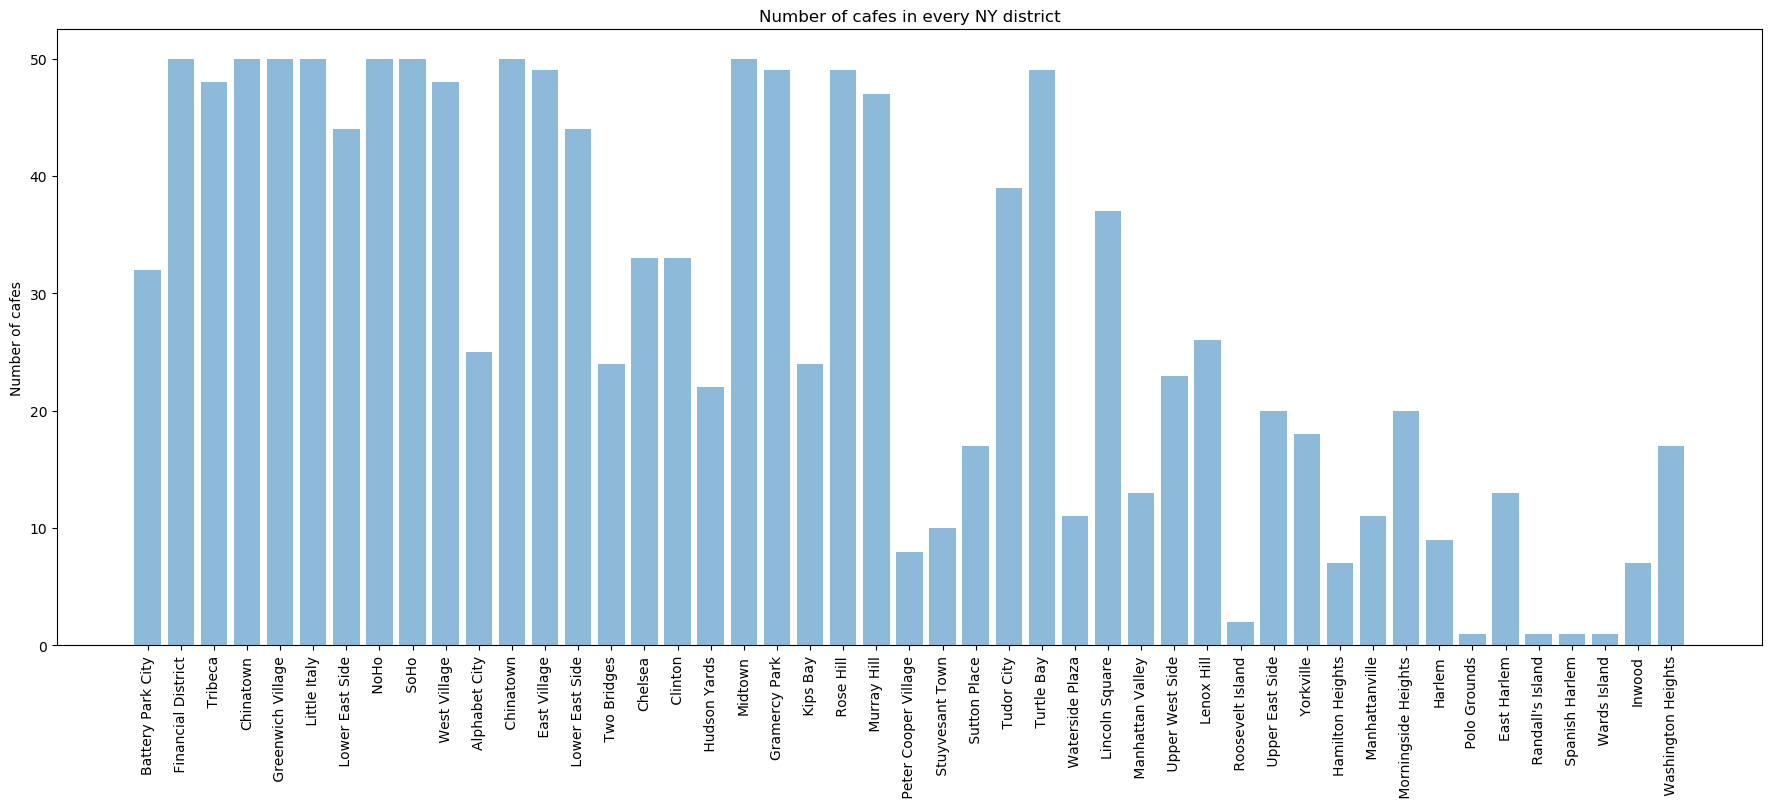

In [252]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 8), facecolor='w', edgecolor='k')

objects = NY['District']
y_pos = np.arange(len(objects))
performance = NY['Number of cafes'].values

plt.xticks(rotation=90)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of cafes')
plt.title('Number of cafes in every NY district')

plt.show()

# Results

In [202]:
# Selecting the districts with the number of cafes higher than in Milan
NY = NY[NY['Number of cafes'] > 45]
NY

,Borough,District,latitude,longitude,Number of cafes
1,Manhattan CB 1,Financial District,40.707612,-74.009378,50
2,Manhattan CB 1,Tribeca,40.715380,-74.009306,48
3,Manhattan CB 2,Chinatown,40.716491,-73.996250,50
4,Manhattan CB 2,Greenwich Village,40.731980,-73.996566,50
5,Manhattan CB 2,Little Italy,40.719273,-73.998215,50
7,Manhattan CB 2,NoHo,40.725875,-73.993957,50
8,Manhattan CB 2,SoHo,40.722880,-73.998750,50
9,Manhattan CB 2,West Village,40.734186,-74.005580,48
11,Manhattan CB 3,Chinatown,40.716491,-73.996250,50
12,Manhattan CB 3,East Village,40.729269,-73.987361,49


In [204]:
print('The number of suitable district are: ' +str(NY.shape[0]))

The number of suitable district are: 15


## Map of the district in NY

In [205]:
# Creating a map of NY.

lat = 40.73
long = -73.98

map_NY = folium.Map(location=[lat, long], zoom_start=11)

for lat, long, label in zip(NY['latitude'], NY['longitude'], NY['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

<img src="https://previews.dropbox.com/p/thumb/AAo0a4cZdwNGHPaBkxBIMZirAjxJojAcxCZs6TfIz4NBWFVDsv2F9fD7NZxx5cMZzkHTTNf4bDuEj4x_IENpF3Ru4Hqa8iW7yJdEGc7WYabajpM78Ni89-TBtt7IB7zbcN1Z59D316FQ4OZnBjpPMdsZS3yV-PtRTQcWvyw13F1JtFnElt_nKzjtfzNMF8kLRm4Oue3qea7G7K_WdOtDFi3fY3quHiqqZnRYEkYpLRe1zFRKsIk6Wr4IUyF3AqL0ALjrjiikPveuT6IuIXuB75sm7hwLIMHBawwqBI_opmJTEPcv5Yqxi2DwtQ0zoHNFrX8hGgC8Rs9kpEquKDlVyu81/p.jpeg?fv_content=true&size_mode=5"/>

# Discussions

It turns out from this analysis that there's an high number of districts in Manhattan with an high concentration of cafes. This is what i expected from a cosmopolitan city like NY.

In this way now i know that i can go to NY and enjoy a good coffy everywhere.

# Conclusions

This methodology has been very helpful to choose the district in NY with the highest concentration of cafes. The advantage is that it can be applied to every city and for different categories like restaurants, museum or gyms thank to the flexibility provided by Foursquare.

In the future this could be strengthen providing also a review rate of the various cafes present in the district.

# Thank you